# Define relevant directories

In [17]:
GAME_DIR = "games/"
GAME_PREFIX = "game_"
REFERENCE_STRATEGY_DIR = "solutions/"
REFERENCE_STRATEGY_PREFIX = "solution_game_"
GENERATED_STRATEGY_DIR = "generated_solutions/"
GENERATED_STRATEGY_PREFIX = "gensolution_game_"
FILE_SUFFIX = ".txt"
PGSOLVER_BASE = "../pgsolver"

def get_game_id_from_gen_solution_file(file):
    return file[len(GENERATED_STRATEGY_DIR + GENERATED_STRATEGY_PREFIX):][:-len(FILE_SUFFIX)]

# Verify Winning Regions

In [18]:
import pg_parser as parser
import os

def compare_regions(pred, act):
    correct, wrong = 0, 0
    for pred_vertex in pred:
        if pred_vertex in act:
            correct += 1
        else:
            wrong += 1
            
    return correct, wrong


num_nodes = []
num_wrong_nodes = []
per_wrong_nodes = []

print("ID;Actual Size Region 0;Nodes correctly predicted in Region 0;Nodes wrongly predicted in Region 0;Percentage wrongly predicted in Region 0")
for generated_solution in os.listdir(GENERATED_STRATEGY_DIR):
    pred_region_0, pred_region_1 = parser.get_solution_short_form(GENERATED_STRATEGY_DIR + generated_solution)
    
    game_id = get_game_id_from_gen_solution_file(GENERATED_STRATEGY_DIR + generated_solution)
    reference_strategy_path = REFERENCE_STRATEGY_DIR + REFERENCE_STRATEGY_PREFIX + game_id + FILE_SUFFIX
    
    act_region_0, _, act_region_1, _ = parser.get_solution(reference_strategy_path)
    
    correct_in_region_0, wrong_in_region_0 = compare_regions(pred_region_0, act_region_0)
    
    num_wrong_nodes.append(wrong_in_region_0)
    num_nodes.append(len(act_region_0) + len(act_region_1))
    
    if not len(act_region_0) == 0:
        percentage_wrong = wrong_in_region_0 * 1.0 / len(act_region_0)
    else:
        percentage_wrong = 0.0
        
    per_wrong_nodes.append(percentage_wrong * 100)
        
    print(f"{game_id};{len(act_region_0)};{correct_in_region_0};{wrong_in_region_0};{percentage_wrong}")
    
print(f"Completely correctly predicted: {num_wrong_nodes.count(0)}")
print(f"One vertex wrong: {num_wrong_nodes.count(1)}")
print(f"Two vertices wrong: {num_wrong_nodes.count(2)}")

ID;Actual Size Region 0;Nodes correctly predicted in Region 0;Nodes wrongly predicted in Region 0;Percentage wrongly predicted in Region 0
2889;71;44;0;0.0
289;2;0;0;0.0
2890;42;10;0;0.0
2891;25;8;1;0.04
2892;90;72;0;0.0
2893;108;87;0;0.0
2894;75;21;0;0.0
2895;87;45;0;0.0
2896;27;16;1;0.037037037037037035
2897;39;13;1;0.02564102564102564
2898;0;0;4;0.0
2899;47;27;2;0.0425531914893617
29;60;44;0;0.0
290;90;68;0;0.0
2900;19;16;0;0.0
2901;93;29;1;0.010752688172043012
2902;67;62;1;0.014925373134328358
2903;90;36;1;0.011111111111111112
2904;73;49;0;0.0
2905;10;1;0;0.0
2906;9;1;0;0.0
2907;20;19;0;0.0
2908;24;7;1;0.041666666666666664
2909;87;42;0;0.0
291;41;12;2;0.04878048780487805
2910;41;28;0;0.0
2911;15;8;1;0.06666666666666667
2912;96;51;0;0.0
2913;95;42;1;0.010526315789473684
2914;48;19;0;0.0
2915;14;8;0;0.0
2916;39;9;1;0.02564102564102564
2917;37;21;0;0.0
2918;28;15;0;0.0
2919;80;38;1;0.0125
292;45;12;1;0.022222222222222223
2920;80;50;0;0.0
2921;32;6;1;0.03125
2922;11;6;1;0.0909090909090

615;39;25;0;0.0
616;54;36;0;0.0
617;49;19;1;0.02040816326530612
618;47;37;2;0.0425531914893617
619;87;76;2;0.022988505747126436
62;64;22;1;0.015625
620;71;40;0;0.0
621;64;46;1;0.015625
622;38;29;0;0.0
623;73;36;0;0.0
624;11;5;1;0.09090909090909091
625;60;53;0;0.0
626;47;21;0;0.0
627;15;8;1;0.06666666666666667
628;68;40;1;0.014705882352941176
629;35;19;0;0.0
63;49;42;0;0.0
630;92;41;1;0.010869565217391304
631;49;31;2;0.04081632653061224
632;90;77;0;0.0
633;66;14;0;0.0
634;65;23;1;0.015384615384615385
635;13;5;0;0.0
636;42;23;0;0.0
637;90;67;1;0.011111111111111112
638;91;39;0;0.0
639;63;31;1;0.015873015873015872
64;13;11;1;0.07692307692307693
640;13;4;2;0.15384615384615385
641;55;31;0;0.0
642;95;53;1;0.010526315789473684
643;10;1;1;0.1
644;66;44;0;0.0
645;23;10;0;0.0
646;16;7;5;0.3125
647;55;28;0;0.0
648;62;13;0;0.0
649;10;6;0;0.0
65;46;39;2;0.043478260869565216
650;82;33;0;0.0
651;19;11;1;0.05263157894736842
652;84;45;0;0.0
653;48;43;1;0.020833333333333332
654;47;39;1;0.0212765957446808

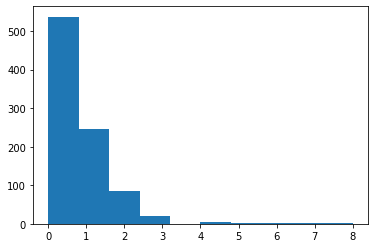

In [19]:
import matplotlib.pyplot as plt
plt.hist(num_wrong_nodes)
plt.show()

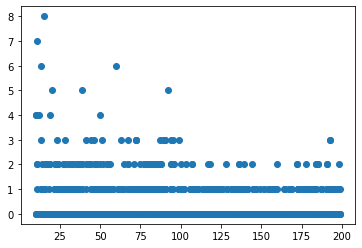

In [20]:
plt.scatter(num_nodes, num_wrong_nodes)
plt.show()

In [21]:
with open('data.dat', 'w') as f:
    f.write("n, num_err\n")
    for (num_nodes, num_wrong_nodes) in list(zip(num_nodes, num_wrong_nodes)):
        f.write(f"{num_nodes} {num_wrong_nodes}\n")

# Verify Strategies

In [4]:
import subprocess

incorrect_solutions = 0

for generated_solution in os.listdir(GENERATED_STRATEGY_DIR):
    generated_solution_path = GENERATED_STRATEGY_DIR + generated_solution
    game_id = get_game_id_from_gen_solution_file(generated_solution_path)
    game_path = GAME_DIR + GAME_PREFIX + game_id + FILE_SUFFIX
    verification_txt = subprocess.run([PGSOLVER_BASE + '/bin/pgsolver', '--parsesolution', generated_solution_path, game_path, "--verify"], capture_output=True, text=True)
    
    if "INVALID solution and/or strategy!" in verification_txt.stdout:
        incorrect_solutions += 1
        
print("Incorrect Solutions: " + str(incorrect_solutions))

Incorrect Solutions: 900
